In [75]:
import torch
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [76]:
x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.8], [8.9], [5.2], [4.59], [2.1], [8], [5], [7.5], [5], [4], [8], [5.2], [4.9], [3], [4.7], [4], [4.8], [3.5], [2.1], [4.1]], dtype=np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.3], [2.6], [1.96], [3.13], [1.76], [3.2], [2.1], [1.6], [2.5], [2.2], [2.75], [2.4], [1.8], [1], [2], [1.6], [2.4], [2.6], [1.5], [3.1]], dtype=np.float32)

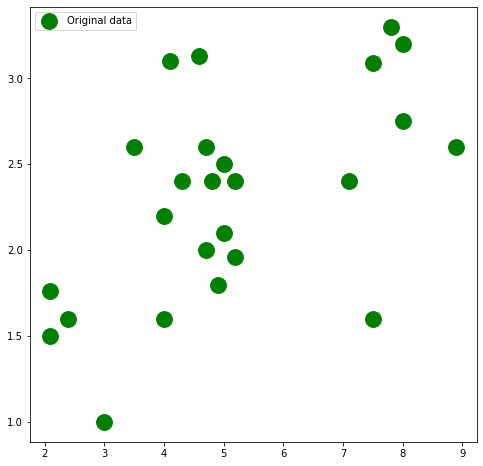

In [77]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.legend()
plt.show()

In [78]:
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [79]:
input_size = 1
hidden_size = 1
output_size = 1
learning_rate = 0.001

In [80]:
w1 = torch.rand(input_size, hidden_size, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [81]:
b1 = torch.rand(hidden_size, output_size, requires_grad=True)
b1.shape

torch.Size([1, 1])

In [82]:
for iter in range(1, 4001):
    y_pred = X_train.mm(w1).clamp(min=0).add(b1)
    loss = (y_pred - Y_train).pow(2).sum()

    if iter % 100 == 0:
        print(iter, loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        b1 -= learning_rate * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

100 6.511880874633789
200 6.240001678466797
300 6.1566972732543945
400 6.1311726570129395
500 6.123351573944092
600 6.120955467224121
700 6.12022066116333
800 6.119996070861816
900 6.119927883148193
1000 6.119906425476074
1100 6.119900226593018
1200 6.119898319244385
1300 6.119896411895752
1400 6.119896411895752
1500 6.11989688873291
1600 6.119896411895752
1700 6.11989688873291
1800 6.11989688873291
1900 6.119895935058594
2000 6.119895935058594
2100 6.119895935058594
2200 6.119895935058594
2300 6.119895935058594
2400 6.119895935058594
2500 6.119895935058594
2600 6.119895935058594
2700 6.119895935058594
2800 6.119895935058594
2900 6.119895935058594
3000 6.119895935058594
3100 6.119895935058594
3200 6.119895935058594
3300 6.119895935058594
3400 6.119895935058594
3500 6.119895935058594
3600 6.119895935058594
3700 6.119895935058594
3800 6.119895935058594
3900 6.119895935058594
4000 6.119895935058594


In [83]:
print('w1: ', w1)
print('b1: ', b1)

w1:  tensor([[0.1751]], requires_grad=True)
b1:  tensor([[1.4045]], requires_grad=True)


In [84]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[4.7000],
        [2.4000],
        [7.5000],
        [7.1000],
        [4.3000],
        [7.8000],
        [8.9000],
        [5.2000],
        [4.5900],
        [2.1000],
        [8.0000],
        [5.0000],
        [7.5000],
        [5.0000],
        [4.0000],
        [8.0000],
        [5.2000],
        [4.9000],
        [3.0000],
        [4.7000],
        [4.0000],
        [4.8000],
        [3.5000],
        [2.1000],
        [4.1000]])

In [85]:
predicted_in_tensor = x_train_tensor.mm(w1).clamp(min=0).add(b1)
predicted_in_tensor

tensor([[2.2273],
        [1.8247],
        [2.7175],
        [2.6475],
        [2.1573],
        [2.7701],
        [2.9626],
        [2.3149],
        [2.2081],
        [1.7721],
        [2.8051],
        [2.2799],
        [2.7175],
        [2.2799],
        [2.1048],
        [2.8051],
        [2.3149],
        [2.2624],
        [1.9297],
        [2.2273],
        [2.1048],
        [2.2448],
        [2.0172],
        [1.7721],
        [2.1223]], grad_fn=<AddBackward0>)

In [86]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[2.227337 ],
       [1.8246688],
       [2.7175417],
       [2.6475124],
       [2.1573079],
       [2.7700639],
       [2.962644 ],
       [2.3148735],
       [2.2080789],
       [1.7721468],
       [2.8050785],
       [2.279859 ],
       [2.7175417],
       [2.279859 ],
       [2.104786 ],
       [2.8050785],
       [2.3148735],
       [2.2623515],
       [1.9297127],
       [2.227337 ],
       [2.104786 ],
       [2.2448444],
       [2.017249 ],
       [1.7721468],
       [2.122293 ]], dtype=float32)

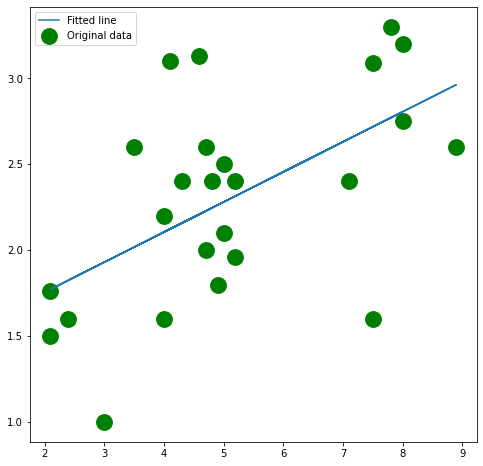

In [87]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='green', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [88]:
#
# Doing the same training using sklearn
#

In [89]:
reg = LinearRegression().fit(x_train, y_train)

In [90]:
print('w1 with sklearn is: ', reg.coef_)
print('b! with sklearn is: ', reg.intercept_)

w1 with sklearn is:  [[0.17507163]]
b! with sklearn is:  [1.4045022]


In [91]:
predicted = reg.predict(x_train)
predicted

array([[2.2273388],
       [1.8246741],
       [2.7175393],
       [2.6475105],
       [2.1573102],
       [2.770061 ],
       [2.9626396],
       [2.3148746],
       [2.208081 ],
       [1.7721525],
       [2.8050752],
       [2.2798603],
       [2.7175393],
       [2.2798603],
       [2.1047888],
       [2.8050752],
       [2.3148746],
       [2.2623532],
       [1.9297171],
       [2.2273388],
       [2.1047888],
       [2.2448459],
       [2.017253 ],
       [1.7721525],
       [2.1222959]], dtype=float32)

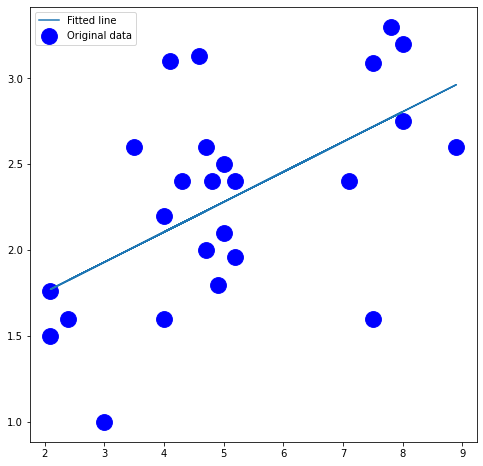

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(x_train, y_train, c='blue', s=250, label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()